# Градиентный спуск

## Задача
Построить модель на основе полносвязных слоёв для классификации Fashion MNIST из библиотеки torchvision. Необходимо получить качество на тестовой выборке не ниже 88%.

## Загрузка и подготовка

Импортируем необходимые библиотеки и датасет.

In [2]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torchvision as tv

BATCH_SIZE=256

In [3]:
train_dataset = tv.datasets.FashionMNIST('.', train=True, transform=tv.transforms.ToTensor(), download=True)
test_dataset = tv.datasets.FashionMNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)
train = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

In [4]:
test_dataset[0][0].shape

torch.Size([1, 28, 28])

In [5]:
test_dataset[0][1]

9

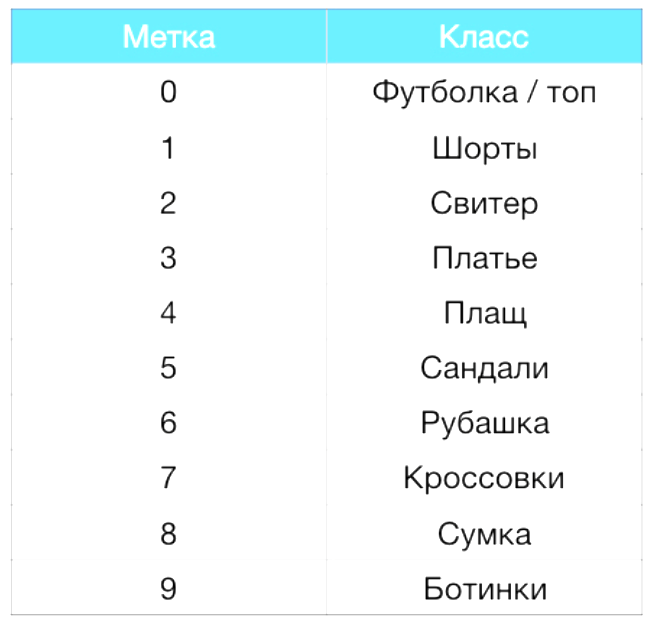

Данные загружены.

## 1 модель

In [6]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(28*28, 256),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(256, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 10)
)

In [7]:
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=256, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=10, bias=True)
)

In [8]:
def train_model():
    '''
    Тренировка модели.
    '''
    for ep in range(1, num_epochs+1):
        train_iters, train_passed  = 0, 0
        train_loss, train_acc = 0., 0.
        start=time.time()
        
        model.train()
        for X, y in train:
            trainer.zero_grad()
            y_pred = model(X)
            l = loss(y_pred, y)
            l.backward()
            trainer.step()
            train_loss += l.item()
            train_acc += (y_pred.argmax(dim=1) == y).sum().item()
            train_iters += 1
            train_passed += len(X)
        
        test_iters, test_passed  = 0, 0
        test_loss, test_acc = 0., 0.
        model.eval()
        for X, y in test:
            y_pred = model(X)
            l = loss(y_pred, y)
            test_loss += l.item()
            test_acc += (y_pred.argmax(dim=1) == y).sum().item()
            test_iters += 1
            test_passed += len(X)
            
        print("ep: {}, taked: {:.3f}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
            ep, time.time() - start, train_loss / train_iters, train_acc / train_passed,
            test_loss / test_iters, test_acc / test_passed)
        )

In [9]:
loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.SGD(model.parameters(), lr=.01)
num_epochs = 10

In [10]:
train_model()

ep: 1, taked: 5.311, train_loss: 2.181245178364693, train_acc: 0.2863833333333333, test_loss: 1.9449992299079895, test_acc: 0.4699
ep: 2, taked: 4.961, train_loss: 1.6248733652398941, train_acc: 0.5157666666666667, test_loss: 1.279232022166252, test_acc: 0.6465
ep: 3, taked: 5.550, train_loss: 1.1682528295415513, train_acc: 0.6025666666666667, test_loss: 0.9811402961611748, test_acc: 0.6587
ep: 4, taked: 5.685, train_loss: 0.9708050897780885, train_acc: 0.6469, test_loss: 0.8527824208140373, test_acc: 0.6823
ep: 5, taked: 5.487, train_loss: 0.8741532919254709, train_acc: 0.679, test_loss: 0.7841006129980087, test_acc: 0.7082
ep: 6, taked: 5.348, train_loss: 0.8146912447949674, train_acc: 0.7024166666666667, test_loss: 0.7393334284424782, test_acc: 0.724
ep: 7, taked: 5.598, train_loss: 0.7715377624998702, train_acc: 0.7219166666666667, test_loss: 0.7051649063825607, test_acc: 0.7405
ep: 8, taked: 4.894, train_loss: 0.7357960137915104, train_acc: 0.73645, test_loss: 0.6766952589154244, 

Качество неудовлетворительное. Усложним.

## 2 модель

In [11]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(28*28, 512),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(512, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 10)
)
trainer = torch.optim.Adam(model.parameters(), lr=.01)
train_model()

ep: 1, taked: 6.734, train_loss: 0.7261812608292763, train_acc: 0.73305, test_loss: 0.5046076856553554, test_acc: 0.8147
ep: 2, taked: 6.130, train_loss: 0.5753388586196494, train_acc: 0.7890166666666667, test_loss: 0.4813466116786003, test_acc: 0.8274
ep: 3, taked: 6.720, train_loss: 0.5413552019190281, train_acc: 0.8020833333333334, test_loss: 0.46543242782354355, test_acc: 0.8333
ep: 4, taked: 7.254, train_loss: 0.5174020478065978, train_acc: 0.8090833333333334, test_loss: 0.4476817861199379, test_acc: 0.8341
ep: 5, taked: 7.113, train_loss: 0.5121897803976181, train_acc: 0.8131833333333334, test_loss: 0.4634045775979757, test_acc: 0.8257
ep: 6, taked: 7.248, train_loss: 0.4984276642190649, train_acc: 0.8174333333333333, test_loss: 0.46040387712419034, test_acc: 0.8349
ep: 7, taked: 8.067, train_loss: 0.4949155003466505, train_acc: 0.8201166666666667, test_loss: 0.45507191494107246, test_acc: 0.8329
ep: 8, taked: 8.302, train_loss: 0.4870339682761659, train_acc: 0.8219666666666666, 

Добавим батч-нормализацию перед слоем активации, увеличим количество слоев.

## 3 модель

In [12]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(28*28, 512),
    torch.nn.BatchNorm1d(512),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(512, 256),
    torch.nn.BatchNorm1d(256),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(256, 128),
    torch.nn.ReLU(),
    torch.nn.Linear(128, 10)
)
trainer = torch.optim.Adam(model.parameters(), lr=.01)
train_model()

ep: 1, taked: 7.399, train_loss: 0.5786327642329195, train_acc: 0.79125, test_loss: 0.48546235747635363, test_acc: 0.8286
ep: 2, taked: 6.926, train_loss: 0.4418382076506919, train_acc: 0.8409, test_loss: 0.4136554952710867, test_acc: 0.845
ep: 3, taked: 6.904, train_loss: 0.40734599968220325, train_acc: 0.8526833333333333, test_loss: 0.3870674792677164, test_acc: 0.8552
ep: 4, taked: 6.879, train_loss: 0.3813505913348908, train_acc: 0.8627333333333334, test_loss: 0.35762563310563567, test_acc: 0.8695
ep: 5, taked: 6.736, train_loss: 0.36592875826866067, train_acc: 0.8694, test_loss: 0.35924135632812976, test_acc: 0.8667
ep: 6, taked: 6.799, train_loss: 0.35198437920276154, train_acc: 0.8722333333333333, test_loss: 0.3348110344260931, test_acc: 0.8783
ep: 7, taked: 7.236, train_loss: 0.3397684492963426, train_acc: 0.8758333333333334, test_loss: 0.3438977412879467, test_acc: 0.8758
ep: 8, taked: 7.085, train_loss: 0.3317079272676022, train_acc: 0.8788166666666667, test_loss: 0.336222644

Вывод. Сходимость функции потерь стала гораздо лучше чем в предыдущих примерах. Такая комбинация слоем показала наилучший результат. Но не достаточный (> 0.88). Добавим дополнительный слой батч-нормализации.

## 4 модель

In [13]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(28*28, 512),
    torch.nn.BatchNorm1d(512),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(512, 256),
    torch.nn.BatchNorm1d(256),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(256, 128),
    torch.nn.BatchNorm1d(128),
    torch.nn.ReLU(),
    torch.nn.Linear(128, 10)
)
trainer = torch.optim.Adam(model.parameters(), lr=.01)
train_model()

ep: 1, taked: 7.282, train_loss: 0.56577287341686, train_acc: 0.7933333333333333, test_loss: 0.4600461766123772, test_acc: 0.8286
ep: 2, taked: 6.980, train_loss: 0.43145430975771965, train_acc: 0.8439, test_loss: 0.37880002744495866, test_acc: 0.86
ep: 3, taked: 7.128, train_loss: 0.39606816654509686, train_acc: 0.8558666666666667, test_loss: 0.3657921329140663, test_acc: 0.867
ep: 4, taked: 7.633, train_loss: 0.37238813638687135, train_acc: 0.8638666666666667, test_loss: 0.35991349518299104, test_acc: 0.864
ep: 5, taked: 7.239, train_loss: 0.351892263394721, train_acc: 0.8725833333333334, test_loss: 0.3513621250167489, test_acc: 0.87
ep: 6, taked: 6.153, train_loss: 0.34015092843390526, train_acc: 0.8756333333333334, test_loss: 0.3448572884313762, test_acc: 0.8717
ep: 7, taked: 6.647, train_loss: 0.33025087650786056, train_acc: 0.8800166666666667, test_loss: 0.34122140603139994, test_acc: 0.8735
ep: 8, taked: 7.028, train_loss: 0.3186905545757172, train_acc: 0.8837666666666667, test_

Данный вариант конфигурации показывает лучшую сходимость функции потерь и показетель точности 0.8744. Пробуем улучшить. 

Добавим дополнительные слои с 64 нейронами.

## 5 модель

In [14]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(28*28, 512),
    torch.nn.BatchNorm1d(512),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(512, 256),
    torch.nn.BatchNorm1d(256),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(256, 128),
    torch.nn.BatchNorm1d(128),
    torch.nn.ReLU(),
    torch.nn.Linear(128, 64),
    # torch.nn.BatchNorm1d(64),
    torch.nn.ReLU(),
    # torch.nn.Dropout(0.5),
    torch.nn.Linear(64, 10)
)
trainer = torch.optim.Adam(model.parameters(), lr=.01)
train_model()

ep: 1, taked: 7.680, train_loss: 0.585574882588488, train_acc: 0.7869166666666667, test_loss: 0.4572010848671198, test_acc: 0.8286
ep: 2, taked: 7.209, train_loss: 0.44353210672419124, train_acc: 0.8418166666666667, test_loss: 0.40770929083228113, test_acc: 0.8521
ep: 3, taked: 7.151, train_loss: 0.403448113101594, train_acc: 0.8552833333333333, test_loss: 0.36916291881352664, test_acc: 0.8642
ep: 4, taked: 7.375, train_loss: 0.37878947625768944, train_acc: 0.8643333333333333, test_loss: 0.3700421618297696, test_acc: 0.8644
ep: 5, taked: 7.379, train_loss: 0.3623835230127294, train_acc: 0.86915, test_loss: 0.3552316978573799, test_acc: 0.8719
ep: 6, taked: 6.442, train_loss: 0.350042247835626, train_acc: 0.8723333333333333, test_loss: 0.35033162627369163, test_acc: 0.8741
ep: 7, taked: 7.434, train_loss: 0.3382459464859455, train_acc: 0.8775, test_loss: 0.3516547964885831, test_acc: 0.8734
ep: 8, taked: 7.273, train_loss: 0.3267133292999673, train_acc: 0.8821666666666667, test_loss: 0.

Качество колеблется, сходимость стала хуже. Попробуем увеличить сеть вширь. И сократим количество слоев.

## 6 модель

In [15]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(28*28, 2048),
    torch.nn.BatchNorm1d(2048),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(2048, 1024),
    torch.nn.ReLU(),
    torch.nn.Linear(1024, 10)
)
trainer = torch.optim.Adam(model.parameters(), lr=.01)
train_model()

ep: 1, taked: 10.830, train_loss: 0.7656777173914808, train_acc: 0.7823166666666667, test_loss: 0.4353154733777046, test_acc: 0.8421
ep: 2, taked: 10.136, train_loss: 0.41723142659410517, train_acc: 0.8485833333333334, test_loss: 0.3964154303073883, test_acc: 0.8567
ep: 3, taked: 9.997, train_loss: 0.38277586711213946, train_acc: 0.8599666666666667, test_loss: 0.383985180221498, test_acc: 0.8624
ep: 4, taked: 13.329, train_loss: 0.3595686713431744, train_acc: 0.8688, test_loss: 0.3726515868678689, test_acc: 0.8652
ep: 5, taked: 12.859, train_loss: 0.33481280841725936, train_acc: 0.87775, test_loss: 0.35254782121628525, test_acc: 0.8723
ep: 6, taked: 12.694, train_loss: 0.32131523008042195, train_acc: 0.8816333333333334, test_loss: 0.3740766152739525, test_acc: 0.8688
ep: 7, taked: 12.179, train_loss: 0.30688995871138064, train_acc: 0.8878166666666667, test_loss: 0.3490066647529602, test_acc: 0.8753
ep: 8, taked: 11.917, train_loss: 0.30068195360772154, train_acc: 0.8889166666666667, te

Еще вариант с дополниительными слоями батч-нормализации

## 7 модель

In [16]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(28*28, 2048),
    torch.nn.BatchNorm1d(2048),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(2048, 1024),
    torch.nn.BatchNorm1d(1024), # тут
    torch.nn.ReLU(),
    torch.nn.Linear(1024, 10)
)
trainer = torch.optim.Adam(model.parameters(), lr=.01)
train_model()

ep: 1, taked: 10.947, train_loss: 0.5525224536023241, train_acc: 0.8016166666666666, test_loss: 0.42412755638360977, test_acc: 0.8477
ep: 2, taked: 10.294, train_loss: 0.3917687596158778, train_acc: 0.8564166666666667, test_loss: 0.3915964141488075, test_acc: 0.8553
ep: 3, taked: 10.033, train_loss: 0.3510559938689496, train_acc: 0.8698833333333333, test_loss: 0.3538941564038396, test_acc: 0.8694
ep: 4, taked: 10.677, train_loss: 0.3240554311808119, train_acc: 0.8793333333333333, test_loss: 0.37275376804172994, test_acc: 0.8604
ep: 5, taked: 10.406, train_loss: 0.3048675054565389, train_acc: 0.8855333333333333, test_loss: 0.35018571708351376, test_acc: 0.8686
ep: 6, taked: 11.532, train_loss: 0.2904323255128049, train_acc: 0.8899833333333333, test_loss: 0.3400026593357325, test_acc: 0.8726
ep: 7, taked: 10.309, train_loss: 0.2763000354487845, train_acc: 0.8954666666666666, test_loss: 0.3310445051640272, test_acc: 0.8806
ep: 8, taked: 9.911, train_loss: 0.26582264836798325, train_acc: 0

Функция потерь стала быстрее и лучше сходиться, показатель качества на тесте 0.8839. 

Попробуем добавить слои


## 8 модель

In [17]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(28*28, 2048),
    torch.nn.BatchNorm1d(2048),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(2048, 1024),
    torch.nn.BatchNorm1d(1024),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(1024, 512),
    torch.nn.BatchNorm1d(512),
    # torch.nn.ReLU(),
    # torch.nn.Linear(256, 128),
    # torch.nn.BatchNorm1d(128),
    torch.nn.ReLU(),
    # torch.nn.Dropout(0.5),
    torch.nn.Linear(512, 10)
)
trainer = torch.optim.Adam(model.parameters(), lr=.01)
train_model()

ep: 1, taked: 12.060, train_loss: 0.5404339621675776, train_acc: 0.7994666666666667, test_loss: 0.4601892001926899, test_acc: 0.8327
ep: 2, taked: 12.115, train_loss: 0.4077527303644951, train_acc: 0.8501833333333333, test_loss: 0.38345715012401344, test_acc: 0.8574
ep: 3, taked: 10.931, train_loss: 0.368576990606937, train_acc: 0.8646333333333334, test_loss: 0.3901371775195003, test_acc: 0.8534
ep: 4, taked: 11.018, train_loss: 0.34784097512985795, train_acc: 0.8724, test_loss: 0.3584934948012233, test_acc: 0.8663
ep: 5, taked: 10.845, train_loss: 0.3270285426302159, train_acc: 0.8788666666666667, test_loss: 0.34991152128204706, test_acc: 0.874
ep: 6, taked: 11.032, train_loss: 0.31302173353256063, train_acc: 0.8833166666666666, test_loss: 0.33672517370432614, test_acc: 0.8745
ep: 7, taked: 11.323, train_loss: 0.2967382144420705, train_acc: 0.8893333333333333, test_loss: 0.32573473248630763, test_acc: 0.8785
ep: 8, taked: 11.418, train_loss: 0.2883482460645919, train_acc: 0.892, test_

Функция хуже сошлась, хоть метрика и на уровне. Скорее всего уменьшение нейронов в слоях не позволяет модели запоминать все закономерности. Следует вернуться к предыдущей модели и на ее базе продолжить исследование. Добавим сложность модели в ширину в 2 раза.

## 9 модель

In [18]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(28*28, 4096),
    torch.nn.BatchNorm1d(4096),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(4096, 2048),
    torch.nn.BatchNorm1d(2048),
    torch.nn.ReLU(),
    torch.nn.Linear(2048, 10)
)
trainer = torch.optim.Adam(model.parameters(), lr=.01)
train_model()

ep: 1, taked: 22.493, train_loss: 0.6412143908916635, train_acc: 0.7936666666666666, test_loss: 0.4567860051989555, test_acc: 0.8408
ep: 2, taked: 23.038, train_loss: 0.4008215237171092, train_acc: 0.85275, test_loss: 0.4079952443018556, test_acc: 0.8482
ep: 3, taked: 22.620, train_loss: 0.35001642615237133, train_acc: 0.8726166666666667, test_loss: 0.3784288987517357, test_acc: 0.8612
ep: 4, taked: 20.781, train_loss: 0.3230238038174649, train_acc: 0.8795666666666667, test_loss: 0.3725696323439479, test_acc: 0.8635
ep: 5, taked: 20.122, train_loss: 0.30388211988388225, train_acc: 0.88615, test_loss: 0.34919288475066423, test_acc: 0.8733
ep: 6, taked: 20.055, train_loss: 0.28889014181938577, train_acc: 0.8916666666666667, test_loss: 0.34971845988184214, test_acc: 0.8757
ep: 7, taked: 19.529, train_loss: 0.2733955012356981, train_acc: 0.8968833333333334, test_loss: 0.34000350087881087, test_acc: 0.8785
ep: 8, taked: 19.824, train_loss: 0.26159952720429036, train_acc: 0.90125, test_loss:

Модель стала дольше в 2 раза обучаться. При этом улучшилась сходимость функции потерь, но test_loss с 7 эпохи вышло на плато. Итоговое качество 0.8854.
Версия - рост в ширину для каждого слоя, возможно, не лучшее решение. Пробуем сделать широким первый слой. остальные вернум в прежние габариты.


## 10 модель (на базе 7)

In [19]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(28*28, 4096),
    torch.nn.BatchNorm1d(4096),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(4096, 1024),
    torch.nn.BatchNorm1d(1024),
    torch.nn.ReLU(),
    torch.nn.Linear(1024, 10)
)
trainer = torch.optim.Adam(model.parameters(), lr=.01)
train_model()

ep: 1, taked: 13.687, train_loss: 0.5428055219193723, train_acc: 0.8063, test_loss: 0.4364922784268856, test_acc: 0.8448
ep: 2, taked: 13.751, train_loss: 0.38833532663101844, train_acc: 0.8573166666666666, test_loss: 0.3797927325591445, test_acc: 0.8602
ep: 3, taked: 13.844, train_loss: 0.34572332761389146, train_acc: 0.87225, test_loss: 0.3575452707707882, test_acc: 0.8696
ep: 4, taked: 13.943, train_loss: 0.3176752455056982, train_acc: 0.883, test_loss: 0.3508501475676894, test_acc: 0.8711
ep: 5, taked: 13.541, train_loss: 0.2992253731539909, train_acc: 0.8885666666666666, test_loss: 0.35710216611623763, test_acc: 0.8709
ep: 6, taked: 14.297, train_loss: 0.28428614805353447, train_acc: 0.8939833333333334, test_loss: 0.3816881196573377, test_acc: 0.8692
ep: 7, taked: 14.526, train_loss: 0.27120397420639686, train_acc: 0.8977833333333334, test_loss: 0.33041172539815306, test_acc: 0.8816
ep: 8, taked: 13.916, train_loss: 0.2585420539404484, train_acc: 0.9020833333333333, test_loss: 0.3

Метрика тестовая 0.8857. Время оптимально. Пока это лучший результат. Пробуем немного поменять размеры слоев и их количество.

## 11 модель

In [20]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(28*28, 4096),
    torch.nn.BatchNorm1d(4096),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(4096, 2048),
    torch.nn.BatchNorm1d(2048),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(2048, 1024),
    torch.nn.BatchNorm1d(1024),
    torch.nn.ReLU(),
    torch.nn.Linear(1024, 10)
)
trainer = torch.optim.Adam(model.parameters(), lr=.01)
train_model()

ep: 1, taked: 24.263, train_loss: 0.5666664098171478, train_acc: 0.796, test_loss: 0.44730023443698885, test_acc: 0.8374
ep: 2, taked: 23.850, train_loss: 0.40480426270911035, train_acc: 0.8514, test_loss: 0.4253892913460732, test_acc: 0.8408
ep: 3, taked: 22.872, train_loss: 0.361473385197051, train_acc: 0.86645, test_loss: 0.4028336089104414, test_acc: 0.8516
ep: 4, taked: 23.023, train_loss: 0.3393283823069106, train_acc: 0.8731833333333333, test_loss: 0.369893049262464, test_acc: 0.8656
ep: 5, taked: 23.430, train_loss: 0.32090276251447963, train_acc: 0.8813, test_loss: 0.3498816732317209, test_acc: 0.8698
ep: 6, taked: 23.141, train_loss: 0.3049429116096902, train_acc: 0.8858833333333334, test_loss: 0.34142130371183155, test_acc: 0.8774
ep: 7, taked: 23.115, train_loss: 0.2954377127454636, train_acc: 0.8892, test_loss: 0.33303057178854945, test_acc: 0.8783
ep: 8, taked: 23.003, train_loss: 0.28283546281621813, train_acc: 0.89425, test_loss: 0.3245969608426094, test_acc: 0.8832
ep:

Нет, этот вариант не улучшил модель. Дополнительные слои не помогают сходимости. Пробуем вернуть лучшую модель и изменить параметры слоев.


## 12 модель

In [21]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(28*28, 4096*2),
    torch.nn.BatchNorm1d(4096*2),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(4096*2, 1024),
    torch.nn.BatchNorm1d(1024),
    torch.nn.ReLU(),
    torch.nn.Linear(1024, 10)
)
trainer = torch.optim.Adam(model.parameters(), lr=.01)
train_model()

ep: 1, taked: 23.872, train_loss: 0.5362012226530846, train_acc: 0.8088, test_loss: 0.43210198506712916, test_acc: 0.8482
ep: 2, taked: 23.479, train_loss: 0.38460846124811376, train_acc: 0.8583333333333333, test_loss: 0.37750178426504133, test_acc: 0.8628
ep: 3, taked: 24.394, train_loss: 0.34389505697057604, train_acc: 0.8729833333333333, test_loss: 0.3904704961925745, test_acc: 0.8546
ep: 4, taked: 24.342, train_loss: 0.31705125316660454, train_acc: 0.8826166666666667, test_loss: 0.36253733914345504, test_acc: 0.8666
ep: 5, taked: 24.938, train_loss: 0.2973824643074198, train_acc: 0.8891833333333333, test_loss: 0.3622246691957116, test_acc: 0.87
ep: 6, taked: 24.219, train_loss: 0.281290676555735, train_acc: 0.89535, test_loss: 0.35887305792421104, test_acc: 0.8723
ep: 7, taked: 25.080, train_loss: 0.26617819001065923, train_acc: 0.8990166666666667, test_loss: 0.3467280775308609, test_acc: 0.8749
ep: 8, taked: 25.730, train_loss: 0.25747753229547055, train_acc: 0.9024333333333333, t

Практически такой же результат, но время хуже. Сходимость такая же. Вернемся к лучшей модели и попробуем учить ее дольше = 15 эпох.

## 10 модель, 15 эпох

In [22]:
num_epochs = 15
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(28*28, 4096),
    torch.nn.BatchNorm1d(4096),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(4096, 1024),
    torch.nn.BatchNorm1d(1024),
    torch.nn.ReLU(),
    torch.nn.Linear(1024, 10)
)
trainer = torch.optim.Adam(model.parameters(), lr=.01)
train_model()

ep: 1, taked: 15.545, train_loss: 0.5384024484360471, train_acc: 0.80665, test_loss: 0.42996372319757936, test_acc: 0.8453
ep: 2, taked: 15.823, train_loss: 0.38571055747093036, train_acc: 0.8583666666666666, test_loss: 0.3885037124156952, test_acc: 0.8573
ep: 3, taked: 16.264, train_loss: 0.34676233758317665, train_acc: 0.8719833333333333, test_loss: 0.3775584926828742, test_acc: 0.8598
ep: 4, taked: 15.979, train_loss: 0.32061458959224376, train_acc: 0.8798, test_loss: 0.3593284167349339, test_acc: 0.8653
ep: 5, taked: 15.928, train_loss: 0.3006217319280543, train_acc: 0.8884333333333333, test_loss: 0.34809773825109, test_acc: 0.872
ep: 6, taked: 15.492, train_loss: 0.2844349892849618, train_acc: 0.8923, test_loss: 0.3478497454896569, test_acc: 0.8766
ep: 7, taked: 15.870, train_loss: 0.27092259900367005, train_acc: 0.8985833333333333, test_loss: 0.35700427554547787, test_acc: 0.8717
ep: 8, taked: 16.086, train_loss: 0.2602847474052551, train_acc: 0.9028166666666667, test_loss: 0.334

## Итоги

Лучший результат у модели ниже с оптимизатором Adam. Самая лучшая сходимость и точность. Обучение на 15 эпохах.
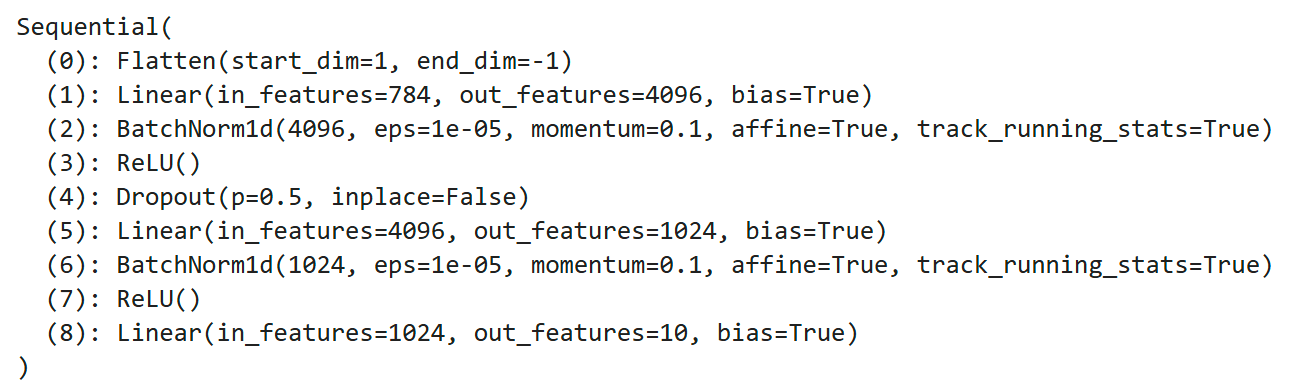
15, taked: 15.845, train_loss: 0.20094825267157657, train_acc: 0.9227333333333333, test_loss: 0.3338013580068946, test_acc: 0.8896



In [23]:
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=4096, bias=True)
  (2): BatchNorm1d(4096, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): ReLU()
  (4): Dropout(p=0.5, inplace=False)
  (5): Linear(in_features=4096, out_features=1024, bias=True)
  (6): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Linear(in_features=1024, out_features=10, bias=True)
)